## This notebook benchmarks to MELTS output from their spreadsheet

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PySulfSat as ss
import Thermobar as pt
pd.options.display.max_columns = None
import math

In [10]:
Liq=pd.read_excel('MELTS_Benchmark.xlsx', sheet_name="Sheet1")

In [20]:
Liq['H2O_Liq'].head()

0    0.493269
1    0.505633
2    0.517950
3    0.530221
4    0.542444
Name: H2O_Liq, dtype: float64

In [13]:
Liq_noFeO=Liq.drop(['FeO_Liq', 'Fe2O3_Liq'], axis=1)
Liq_noFeO.head()

,Unnamed: 0,T_C,P_bar,h,s,v,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Cr2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,CO2_Liq,Fe3Fet_Liq,h_Liq,mass_Liq,v_Liq,rho_Liq,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,Cr2O3_Cpx,Fe2O3_Cpx,FeO_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,P2O5_Cpx,H2O_Cpx,CO2_Cpx,Fe3Fet_Cpx,h_Cpx,mass_Cpx,v_Cpx,rho_Cpx,SiO2_Plag,TiO2_Plag,Al2O3_Plag,Cr2O3_Plag,Fe2O3_Plag,FeO_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,P2O5_Plag,H2O_Plag,CO2_Plag,Fe3Fet_Plag,h_Plag,mass_Plag,v_Plag,rho_Plag,SiO2_Cpx2,TiO2_Cpx2,Al2O3_Cpx2,Cr2O3_Cpx2,Fe2O3_Cpx2,FeO_Cpx2,FeOt_Cpx2,MnO_Cpx2,MgO_Cpx2,CaO_Cpx2,Na2O_Cpx2,K2O_Cpx2,P2O5_Cpx2,H2O_Cpx2,CO2_Cpx2,Fe3Fet_Cpx2,h_Cpx2,mass_Cpx2,v_Cpx2,rho_Cpx2,SiO2_Sp,TiO2_Sp,Al2O3_Sp,Cr2O3_Sp,Fe2O3_Sp,FeO_Sp,FeOt_Sp,MnO_Sp,MgO_Sp,CaO_Sp,Na2O_Sp,K2O_Sp,P2O5_Sp,H2O_Sp,CO2_Sp,Fe3Fet_Sp,h_Sp,mass_Sp,v_Sp,rho_Sp,SiO2_Ol,TiO2_Ol,Al2O3_Ol,Cr2O3_Ol,Fe2O3_Ol,FeO_Ol,FeOt_Ol,MnO_Ol,MgO_Ol,CaO_Ol,Na2O_Ol,K2O_Ol,P2O5_Ol,H2O_Ol,CO2_Ol,Fe3Fet_Ol,h_Ol,mass_Ol,v_Ol,rho_Ol,S_Calc_LiSpreadsheet,Unnamed: 127
0,0,1164.900000,1000,-1.181233e+06,266.394331,37.024765,50.137808,2.028321,13.056824,0,13.166887,0.248607,6.541730,11.203120,2.456478,0.243675,0.186456,0.493269,0.098654,0.099881,-1.181233e+06,100.000000,37.024765,2.700895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1085.462885,0
1,1,1159.903030,1000,-1.182930e+06,265.212143,36.885830,50.111012,2.065875,13.283926,0,13.289512,0.254839,6.301406,10.993500,2.513726,0.249783,0.191129,0.505633,0.101127,0.099216,-1.151868e+06,97.554675,36.131603,2.699982,51.206819,0.530124,3.996713,0.0,1.310048,7.088627,8.274828,0.0,16.129308,19.565751,0.172609,0.0,0.0,0.0,0.0,0.142453,-31062.045407,2.445325,0.754227,3.242163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1053.975623,1
2,2,1154.906061,1000,-1.153492e+06,258.398613,35.999508,50.088615,2.102257,13.506689,0,13.406435,0.261047,6.066451,10.785876,2.570613,0.255868,0.195785,0.517950,0.103590,0.098558,-1.124063e+06,95.234731,35.284907,2.699022,51.030414,0.572382,4.139407,0.0,1.338820,7.277521,8.489773,0.0,15.946389,19.516588,0.178480,0.0,0.0,0.0,0.0,0.141896,-29428.534921,2.319944,0.714600,3.246491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1022.806809,2
3,3,1149.909091,1000,-1.125619e+06,251.930528,35.159150,50.070617,2.137428,13.725142,0,13.517733,0.267231,5.836841,10.580203,2.627140,0.261929,0.200423,0.530221,0.106044,0.097905,-1.097703e+06,93.030849,34.481225,2.698015,50.848356,0.617611,4.285275,0.0,1.368189,7.469466,8.708311,0.0,15.758820,19.467781,0.184501,0.0,0.0,0.0,0.0,0.141369,-27916.403443,2.203882,0.677925,3.250925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,991.974407,3
4,4,1144.912121,1000,-1.099195e+06,245.782208,34.361342,50.057023,2.171349,13.939332,0,13.623489,0.273392,5.612534,10.376420,2.68331

In [15]:
df=ss.calculate_LiZhang2022_SCSS(df=Liq_noFeO, T_K=Liq['T_C']+273.15, P_kbar=1, 
H2O_Liq=Liq['H2O_Liq'], Fe_FeNiCu_Sulf=0.6, logfo2=-9)


replacing Fe3Fet_Liq in the original dataframe with that input into the function


Text(0, 0.5, 'PySulfSat-Spreadsheet')

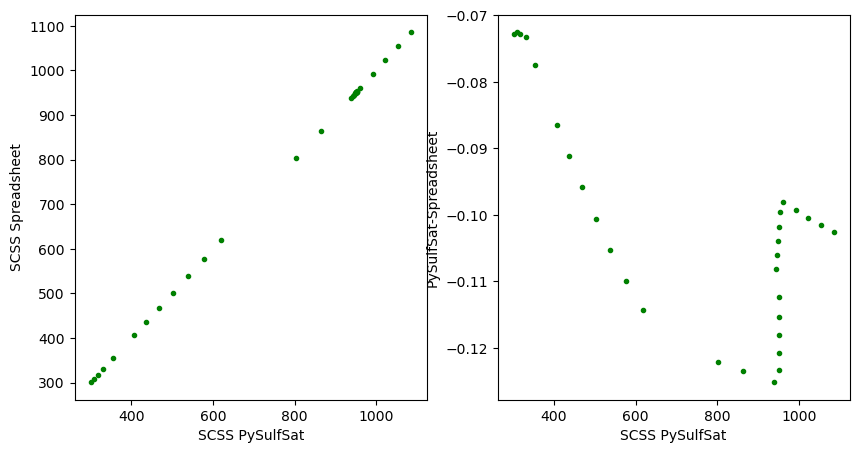

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.plot(df['SCSS_Tot'], Liq['S_Calc_LiSpreadsheet'],
         '.g')
ax2.plot(df['SCSS_Tot'], df['SCSS_Tot']-Liq['S_Calc_LiSpreadsheet'],
         '.g')
ax1.set_xlabel('SCSS PySulfSat')
ax1.set_ylabel('SCSS Spreadsheet')
ax2.set_xlabel('SCSS PySulfSat')
ax2.set_ylabel('PySulfSat-Spreadsheet')